In [6]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118



Looking in indexes: https://download.pytorch.org/whl/cu118
   ---------------------------------------- 0.0/2.7 GB ? eta -:--:--
   ---------------------------------------- 0.0/2.7 GB 8.4 MB/s eta 0:05:25
   ---------------------------------------- 0.0/2.7 GB 11.7 MB/s eta 0:03:54
   ---------------------------------------- 0.0/2.7 GB 11.3 MB/s eta 0:04:01
   ---------------------------------------- 0.0/2.7 GB 11.7 MB/s eta 0:03:52
   ---------------------------------------- 0.0/2.7 GB 11.7 MB/s eta 0:03:52
   ---------------------------------------- 0.0/2.7 GB 11.7 MB/s eta 0:03:52
   ---------------------------------------- 0.0/2.7 GB 11.7 MB/s eta 0:03:51
   ---------------------------------------- 0.0/2.7 GB 11.7 MB/s eta 0:03:51
   ---------------------------------------- 0.0/2.7 GB 11.8 MB/s eta 0:03:49
   ---------------------------------------- 0.0/2.7 GB 11.8 MB/s eta 0:03:50
   ---------------------------------------- 0.0/2.7 GB 11.8 MB/s eta 0:03:50
   -----------------------

In [7]:
import torch

print("✅ PyTorch Version:", torch.__version__)

# Check if GPU is available
if torch.cuda.is_available():
    print("✅ GPU is available! Using:", torch.cuda.get_device_name(0))
else:
    print("❌ GPU not available, using CPU.")


✅ PyTorch Version: 2.6.0+cu118
✅ GPU is available! Using: NVIDIA GeForce RTX 3070 Ti Laptop GPU


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset


In [10]:
# Set device (Use GPU if available, else CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Move Generator & Discriminator to GPU
generator = Generator().to(device)
discriminator = Discriminator().to(device)


Using device: cuda


In [31]:
!pip install tensorflow


In [33]:
!pip install scikit-learn


   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ------- -------------------------------- 2.1/11.1 MB 11.8 MB/s eta 0:00:01
   ---------------- ----------------------- 4.5/11.1 MB 11.7 MB/s eta 0:00:01
   ------------------------ --------------- 6.8/11.1 MB 12.0 MB/s eta 0:00:01
   -------------------------------- ------- 9.2/11.1 MB 11.9 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 11.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/43.9 MB ? eta -:--:--
   -- ------------------------------------- 2.4/43.9 MB 11.2 MB/s eta 0:00:04
   ---- ----------------------------------- 4.7/43.9 MB 11.4 MB/s eta 0:00:04
   ------ --------------------------------- 7.1/43.9 MB 11.5 MB/s eta 0:00:04
   -------- ------------------------------- 9.4/43.9 MB 11.5 MB/s eta 0:00:03
   ---------- ----------------------------- 11.8/43.9 MB 11.5 MB/s eta 0:00:03
   ------------- -------------------------- 14.4/43.9 MB 11.6 MB/s eta 0:00:03

In [37]:
pip install --upgrade numpy scipy scikit-learn


  Using cached numpy-2.2.2-cp311-cp311-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.2.2-cp311-cp311-win_amd64.whl (12.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.2 which is incompatible.


In [22]:
pip install --upgrade tensorflow keras tensorflow-addons


Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy
import scipy
import sklearn

print("NumPy Version:", numpy.__version__)
print("SciPy Version:", scipy.__version__)
print("Scikit-learn Version:", sklearn.__version__)


NumPy Version: 1.26.4
SciPy Version: 1.15.1
Scikit-learn Version: 1.6.1


In [25]:
pip install numpy==1.26.4


Note: you may need to restart the kernel to use updated packages.


In [26]:
!pip install tensorflow-addons


In [27]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras

import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

In [28]:
# Set dataset paths
DATASET_PATH = r"C:\Users\plawa\miniProject\data\UIEB"

INPUT_IMAGES_PATH = os.path.join(DATASET_PATH, "reference-890")  # Original underwater images
TARGET_IMAGES_PATH = os.path.join(DATASET_PATH, "raw-890")  # Ground-truth (enhanced) images

# Function to load and preprocess images
def load_images(folder, img_size=(256, 256)):
    images = []
    filenames = sorted(os.listdir(folder))  # Ensure corresponding images align
    for filename in filenames:
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, img_size)  # Resize to 256x256
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
            img = img / 255.0  # Normalize pixel values
            images.append(img)
    return np.array(images)

# Load input and target images
input_images = load_images(INPUT_IMAGES_PATH)
target_images = load_images(TARGET_IMAGES_PATH)

# Check dataset size
print(f"Loaded {len(input_images)} input images and {len(target_images)} target images.")


Loaded 890 input images and 890 target images.


In [29]:
# Split into training and validation sets (80% train, 20% test)
X_train, X_val, Y_train, Y_val = train_test_split(input_images, target_images, test_size=0.2, random_state=42)

# Print dataset shape
print(f"Training set: {X_train.shape}, {Y_train.shape}")
print(f"Validation set: {X_val.shape}, {Y_val.shape}")


Training set: (712, 256, 256, 3), (712, 256, 256, 3)
Validation set: (178, 256, 256, 3), (178, 256, 256, 3)


In [30]:
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
# from tensorflow.keras.applications import VGG19
# from tensorflow.keras.models import Model
# import tensorflow.image as tf_image

# def perceptual_loss(y_true, y_pred):
#     """VGG-based perceptual loss to enhance perceptual quality."""
#     vgg = VGG19(include_top=False, weights="imagenet", input_shape=(256, 256, 3))
#     vgg_model = Model(inputs=vgg.input, outputs=vgg.get_layer("block2_conv2").output)
#     return tf.reduce_mean(tf.square(vgg_model(y_true) - vgg_model(y_pred)))

# def build_model(input_shape=(256, 256, 3)):
#     inputs = keras.Input(shape=input_shape)

#     # Multi-scale convolution
#     conv1 = layers.Conv2D(64, (3, 3), padding="same")(inputs)
#     conv2 = layers.Conv2D(64, (5, 5), padding="same")(inputs)
#     conv3 = layers.Conv2D(64, (7, 7), padding="same")(inputs)

#     x = layers.Concatenate()([conv1, conv2, conv3])
#     x = layers.LeakyReLU(alpha=0.1)(x)  # Using LeakyReLU

#     # Encoder
#     x = layers.Conv2D(128, (3, 3), padding="same")(x)
#     x = layers.LeakyReLU(alpha=0.1)(x)
#     x = layers.MaxPooling2D((2, 2))(x)

#     x = layers.Conv2D(256, (3, 3), padding="same")(x)
#     x = layers.LeakyReLU(alpha=0.1)(x)

#     skip = x  # Save skip connection before downsampling

#     # Decoder
#     x = layers.Conv2DTranspose(128, (3, 3), padding="same")(x)
#     x = layers.LeakyReLU(alpha=0.1)(x)
#     x = layers.UpSampling2D((2, 2))(x)

#     x = layers.Conv2DTranspose(64, (3, 3), padding="same")(x)
#     x = layers.LeakyReLU(alpha=0.1)(x)

#     # **Fix: Adjust skip connection depth before adding**
#     skip_resized = layers.UpSampling2D((2, 2))(skip)  # Match spatial size
#     skip_adjusted = layers.Conv2D(64, (1, 1), padding="same")(skip_resized)  # Match depth

#     x = layers.Add()([x, skip_adjusted])  # Adding corrected skip connection

#     x = layers.UpSampling2D((2, 2))(x)
#     outputs = layers.Conv2D(3, (3, 3), activation="sigmoid", padding="same")(x)  # Sigmoid for final output

#     model = keras.Model(inputs, outputs, name="EnhancedUnderwaterModel")
#     return model

# # Build and compile model
# model = build_model()
# model.compile(optimizer="adam", loss=perceptual_loss, metrics=[tf_image.ssim])
# model.summary()


In [34]:
import tensorflow as tf
print(tf.__version__)


2.18.0


In [39]:
!pip install tensorflow-addons==0.22.0



In [2]:
!pip uninstall tensorflow -y


Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0


In [2]:
!pip install tensorflow==2.14.0


In [5]:
import tensorflow as tf
from tensorflow.keras.layers import (Input, Conv2D, LeakyReLU, GlobalAveragePooling2D, Dense, 
                                     Reshape, Multiply, Add, Concatenate, Lambda, MaxPooling2D)
from tensorflow.keras.models import Model
import tensorflow_addons as tfa  # Remove if replacing TFA


C:\Users\plawa\anaconda3\envs\miniProject\Lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [4]:
!pip uninstall tensorflow-addons -y


Found existing installation: tensorflow-addons 0.22.0
Uninstalling tensorflow-addons-0.22.0:
  Successfully uninstalled tensorflow-addons-0.22.0


In [1]:
!pip install tensorflow==2.14.0 tensorflow-addons==0.22.0


  Using cached tensorflow_addons-0.22.0-cp311-cp311-win_amd64.whl.metadata (1.8 kB)
Using cached tensorflow_addons-0.22.0-cp311-cp311-win_amd64.whl (719 kB)


In [8]:
import tensorflow as tf
from tensorflow.keras.layers import (
    Input, Conv2D, LeakyReLU, Add, Multiply, Dense, Reshape, 
    GlobalAveragePooling2D, MaxPooling2D, Concatenate, UpSampling2D, Lambda
)
from tensorflow.keras.models import Model
import tensorflow_addons as tfa

# Adaptive Instance Normalization (better texture preservation)
def adaptive_instance_norm(x):
    return tfa.layers.InstanceNormalization()(x)

# Residual Block with Attention
def residual_attention_block(x, filters):
    res = Conv2D(filters, (3, 3), padding='same', activation=None)(x)
    res = adaptive_instance_norm(res)
    res = LeakyReLU()(res)
    
    res = Conv2D(filters, (3, 3), padding='same', activation=None)(res)
    res = adaptive_instance_norm(res)
    
    # Channel Attention
    se = GlobalAveragePooling2D()(res)
    se = Dense(filters // 8, activation='relu')(se)
    se = Dense(filters, activation='sigmoid')(se)
    se = Reshape((1, 1, filters))(se)
    res = Multiply()([res, se])  # Apply attention
    
    return Add()([x, res])  # Skip connection

# Multi-Scale Residual Block (for sharper enhancement)
def multi_scale_residual_block(x, filters):
    conv1 = Conv2D(filters, (3, 3), padding='same', activation=None)(x)
    conv1 = adaptive_instance_norm(conv1)
    conv1 = LeakyReLU()(conv1)

    conv2 = Conv2D(filters, (5, 5), padding='same', activation=None)(x)
    conv2 = adaptive_instance_norm(conv2)
    conv2 = LeakyReLU()(conv2)
    
    conv3 = Conv2D(filters, (7, 7), padding='same', activation=None)(x)
    conv3 = adaptive_instance_norm(conv3)
    conv3 = LeakyReLU()(conv3)

    concat = Concatenate()([conv1, conv2, conv3])
    
    return Conv2D(filters, (1, 1), padding='same', activation=None)(concat)

# Pixel Shuffle Upsampling (for better reconstruction)
def pixel_shuffle_upsample(x, scale=2):
    x = Conv2D(4 * x.shape[-1], (3, 3), padding="same")(x)  # Increase channels
    return Lambda(lambda x: tf.nn.depth_to_space(x, scale))(x)  # Shuffle pixels

# High-Quality Underwater Model
def build_high_quality_model():
    inputs = Input(shape=(256, 256, 3))

    # Initial Feature Extraction
    conv1 = Conv2D(64, (3, 3), padding='same', activation=None)(inputs)
    conv1 = adaptive_instance_norm(conv1)
    conv1 = LeakyReLU()(conv1)

    # Multi-scale residual feature extraction
    mrb1 = multi_scale_residual_block(conv1, 64)
    res1 = residual_attention_block(mrb1, 64)

    # Downsampling
    pool1 = MaxPooling2D(pool_size=(2, 2))(res1)

    mrb2 = multi_scale_residual_block(pool1, 128)
    res2 = residual_attention_block(mrb2, 128)

    # Downsampling again
    pool2 = MaxPooling2D(pool_size=(2, 2))(res2)

    mrb3 = multi_scale_residual_block(pool2, 256)
    res3 = residual_attention_block(mrb3, 256)

    # Bottleneck layer
    mrb4 = multi_scale_residual_block(res3, 512)
    res4 = residual_attention_block(mrb4, 512)

    # Upsampling with Pixel Shuffle
    up1 = pixel_shuffle_upsample(res4)
    res3_upsampled = UpSampling2D(size=(2, 2))(res3)  # Ensure size matches
    up1 = Concatenate()([up1, res3_upsampled])  # Skip connection

    mrb5 = multi_scale_residual_block(up1, 256)
    res5 = residual_attention_block(mrb5, 256)

    up2 = pixel_shuffle_upsample(res5)
    res2_upsampled = UpSampling2D(size=(2, 2))(res2)  # Ensure size matches
    up2 = Concatenate()([up2, res2_upsampled])  # Skip connection

    mrb6 = multi_scale_residual_block(up2, 128)
    res6 = residual_attention_block(mrb6, 128)

    up3 = pixel_shuffle_upsample(res6)
    res1_upsampled = UpSampling2D(size=(2, 2))(res1)  # Ensure size matches
    up3 = Concatenate()([up3, res1_upsampled])  # Skip connection

    mrb7 = multi_scale_residual_block(up3, 64)
    res7 = residual_attention_block(mrb7, 64)

    # Output Layer with Tanh Activation
    outputs = Conv2D(3, (3, 3), activation='tanh', padding='same')(res7)

    model = Model(inputs, outputs, name="HighQualityUnderwaterModel")
    return model

# Compile Model
hq_model = build_high_quality_model()
hq_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='mse')

# Print Model Summary
hq_model.summary()


Model: "HighQualityUnderwaterModel"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_52 (Conv2D)          (None, 256, 256, 64)         1792      ['input_3[0][0]']             
                                                                                                  
 instance_normalization_42   (None, 256, 256, 64)         128       ['conv2d_52[0][0]']           
 (InstanceNormalization)                                                                          
                                                                                                  
 leaky_re_lu_34 (LeakyReLU)  (None, 256, 256, 64)         0         ['ins

In [18]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

# Set dataset paths
DATASET_PATH = r"C:\Users\plawa\miniProject\data\UIEB"
INPUT_IMAGES_PATH = os.path.join(DATASET_PATH, "reference-890")  # Underwater images
TARGET_IMAGES_PATH = os.path.join(DATASET_PATH, "raw-890")  # Ground-truth images

# Function to load and preprocess images
def load_images(folder, img_size=(256, 256)):
    images = []
    filenames = sorted(os.listdir(folder))  # Ensure corresponding images align
    for filename in filenames:
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, img_size)  # Resize to 256x256
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
            img = img / 255.0  # Normalize pixel values
            images.append(img)
    return np.array(images)

# Load input and target images
input_images = load_images(INPUT_IMAGES_PATH)
target_images = load_images(TARGET_IMAGES_PATH)

# Check dataset size
print(f"Loaded {len(input_images)} input images and {len(target_images)} target images.")

# Train-validation split
split_ratio = 0.9  # 90% training, 10% validation
split_index = int(len(input_images) * split_ratio)

x_train, x_val = input_images[:split_index], input_images[split_index:]
y_train, y_val = target_images[:split_index], target_images[split_index:]

print(f"Training size: {len(x_train)}, Validation size: {len(x_val)}")

# Build model (assuming `build_high_quality_model()` function is defined)
hq_model = build_high_quality_model()

# Compile the model
hq_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='mse')

# Define callbacks
checkpoint = ModelCheckpoint(
    "underwater_model_best.h5",
    monitor="val_loss",
    save_best_only=True,
    mode="min",
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# Train the model
hq_model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=50,
    batch_size=8,
    callbacks=[checkpoint, reduce_lr]
)

# Save final trained model
hq_model.save("underwater_model_final.h5")
print("Training complete. Model saved.")


Loaded 890 input images and 890 target images.
Training size: 801, Validation size: 89
Epoch 1/50


ValueError: in user code:

    File "C:\Users\plawa\anaconda3\envs\miniProject\Lib\site-packages\keras\src\engine\training.py", line 1377, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\plawa\anaconda3\envs\miniProject\Lib\site-packages\keras\src\engine\training.py", line 1360, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\plawa\anaconda3\envs\miniProject\Lib\site-packages\keras\src\engine\training.py", line 1349, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\plawa\anaconda3\envs\miniProject\Lib\site-packages\keras\src\engine\training.py", line 1127, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\plawa\anaconda3\envs\miniProject\Lib\site-packages\keras\src\engine\training.py", line 1185, in compute_loss
        return self.compiled_loss(
    File "C:\Users\plawa\anaconda3\envs\miniProject\Lib\site-packages\keras\src\engine\compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\plawa\anaconda3\envs\miniProject\Lib\site-packages\keras\src\losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\plawa\anaconda3\envs\miniProject\Lib\site-packages\keras\src\losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\plawa\anaconda3\envs\miniProject\Lib\site-packages\keras\src\losses.py", line 1706, in mean_squared_error
        return backend.mean(tf.math.squared_difference(y_pred, y_true), axis=-1)

    ValueError: Dimensions must be equal, but are 512 and 256 for '{{node mean_squared_error/SquaredDifference}} = SquaredDifference[T=DT_FLOAT](HighQualityUnderwaterModel/conv2d_145/Tanh, IteratorGetNext:1)' with input shapes: [?,512,512,3], [?,256,256,3].


In [ ]:
# Save model for future use
hq_model.save("underwater_enhancer_hq.h5")
print("hq_Model saved successfully.")


In [8]:
# Save model for future use
model.save("underwater_enhancer.h5")
print("Model saved successfully.")


Model saved successfully.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


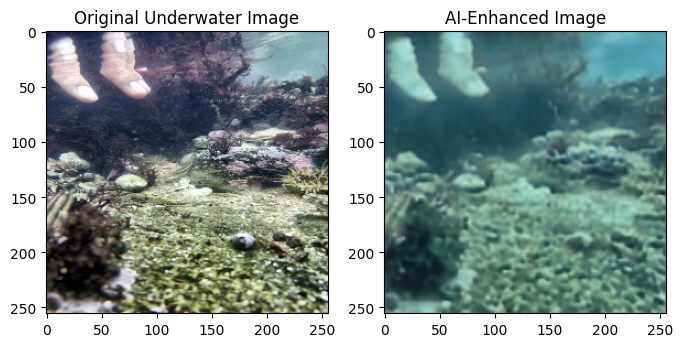

In [9]:
def predict_and_show(model, test_images, index=0):
    """Predict and display results for a test image."""
    input_img = test_images[index]
    pred_img = model.predict(np.expand_dims(input_img, axis=0))[0]

    # Display original vs enhanced
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(input_img)
    plt.title("Original Underwater Image")
    
    plt.subplot(1, 2, 2)
    plt.imshow(pred_img)
    plt.title("AI-Enhanced Image")
    
    plt.show()

# Run prediction
predict_and_show(model, X_val, index=5)
